##Objects of Computation

###Discussion Notes 2

**31 May 2015**

In our first notebook discussion (dated 25 May 2015) we looked at different types of mathematical computations as a way to explore how to write computations in Julia and the basic programming resources in Julia. We saw that even with only a few syntactic forms (Julia offers many more than we used), you can do a lot of interesting computations. 

The first key idea that we developed was to write functions that can take functions themselves as arguments and also return functions as values. This lets us work directly with the abstract ideas underlying concrete computations. Sometimes this capability provides us with useful flexibility in adapting computations or insight into the computation itself.

The second key idea was to structure computations in terms of their component concepts or steps. This approach to writing computations helps us to understand the computation better and also it helps others understand what the code does. Generally code is easier to read when its structure reflects clearly the concepts and actions that the computation works through. It is probably also easier to modify code that clearly features the conceptual steps of the computational process.

In the discussion notes here our attention turns from the structure of computation processes to the structure of the objects of computations. In our prior notes we worked with numbers and mostly integers at that. It is however often useful to build more involved structures and we will consider how to do this now.

There are two key operations that a language must have to be able to build up and use structured objects or data for computation:

1. A *constructor* that can bind objects together
2. *Selectors* that can pick out the parts of a structure built up by a constructor

###Constructing Objects For Computation

Construct objects using `type` . . . `end`.

The `type` command binds data that you want to specify and you can further specify data type. 

For example, here we create an object called `Orc` characterized by `height`, `weight`, and `weapon`.

In [1]:
type Orc
    height::Float64
    weight::Float64
    weapon::String
end

In [2]:
Asog = Orc(7.2, 482.0, "halbard")

Orc(7.2,482.0,"halbard")

When a type (e.g., `Orc`) is applied like a function, it is called a *constructor*. Here we constructed an `Orc` named `Asog` with the specified values for the `Orc type` fields `height`, `weight`, and `weapon`.

###Selecting Parts Of Objects

In [3]:
Asog.height

7.2

In [4]:
Asog.weight

482.0

In [5]:
Asog.weapon

"halbard"

####Example Composite Data Structure: Rational Numbers

Julia actually has its own built-in type for rational numbers and we will look at that in a bit. But to illustrate making a composite data type we will write code a rational number system.

This will use GCD.

Recall Euclid's method to compute the GCD using the fact that

>GCD(a, b) = GCD(b, r)

>where r = a%b

In [6]:
function EuclidGCD(a, b)
    if b == 0
        a
        else EuclidGCD(b, a%b)
    end
end

EuclidGCD (generic function with 1 method)

In [7]:
EuclidGCD(144, 36)

36

In [8]:
EuclidGCD(52, 18)

2

The `type` syntax lets you create an object and identify data fields for that object. 

In [9]:
type rat
    num::Int64
    den::Int64
end

Now we have a type called `rat` with two data fields, `num` and `den` both of which must have type `Int64`.

In [10]:
rat(23, 54)

rat(23,54)

####Constructors

There are different ways to identify a constructor for `rat`. The `rat` type itself could be viewed as a constructor. We could also write a function `Makerat` that takes 2 integers and returns their `rat`. Further we can simplify the rational number by factoring out the greated common divisor of the numerator and the denominator.

In [11]:
function makerat(n, d) # a constructor for the rat type given a numerator and a denom
    if n == 0 && d == 0
        error("invalid rational: 0//0")
    else
        g = gcd(n, d)
        num = div (n, g)
        den = div(d, g)
        rat(num, den)
    end
end

makerat (generic function with 1 method)

In [12]:
r = makerat(25, 15)

rat(5,3)

####Selectors

The selectors are simple: just a `.fieldname` appended to the name of the object. For example, for our `rat` r, `r.num` gives the numerator and `r.den` gives the denominator.

In [13]:
r.num

5

In [14]:
r.den

3

So now we have a way to build rationals, or other composite types, and also to retrieve the parts of these composites. This is what we need to build layers of abstraction and to go back and forth between those layers.

Here is a function to print our new `rat` type numbers:

In [15]:
function printrat(r)
    println(string(r.num), "//", string(r.den))
end

printrat (generic function with 1 method)

In [16]:
printrat(r)

5//3


NB: The `string()` function converts its argument to the `string` type.

With the `makerat` constructor and the `name.num` and `name.den` selectors we can build a system for working on rational numbers.

Note that Julia has a built-in rational numbers package also using these concepts but in a form that is more intrinsic to the Julia language. We will study the specifics of the Julia idiom subsequently. You can see Julia's Rationals implementation at https://github.com/JuliaLang/julia/blob/master/base/rational.jl.

####Defining Operations On Rational Numbers

Addition and Subtraction

>n1/d1 + n2/d2  =  (n1d2 + n2d1) / d1d2

Multiplication

>n1/d1 &times; n2/d2 = n1n2 / d1d2

Division

>n1/d1 / n2/d2 = n1/d1 &times; d2/n2

Negative

>-(n1/d1) = -n1/d1

Equality test

>n1/d1 = n2/d2 &iff;

>n1d2  = d1n2

In [17]:
function addrat(x, y)
    makerat(x.num*y.den+x.den*y.num, x.den*y.den)
end

function mulrat(x, y)
    makerat(x.num*y.num, x.den*y.den)
end

function divrat(x, y)
    makerat(x.num*y.den, x.den*y.num)
end

function negrat(r)
    makerat(-r.num, r.den)
end

function equalrat(x, y)
    x.num*y.den == y.num*x.den
end

equalrat (generic function with 1 method)

In [18]:
fiveeighths = makerat(5, 8)

rat(5,8)

In [19]:
threesixteenths = makerat(3, 16)

rat(3,16)

In [20]:
eightsixteenths = makerat(8, 16)

rat(1,2)

In [21]:
addrat(fiveeighths, threesixteenths)

rat(13,16)

In [22]:
ans

rat(13,16)

In [23]:
divrat(ans, eightsixteenths)

rat(13,8)

In [24]:
negrat(ans)

rat(-13,8)

In [25]:
equalrat(eightsixteenths, fiveeighths)

false

In [26]:
equalrat(makerat(1,2), eightsixteenths)

true

Thus using a means to construct composite data and to decompose that composite data lets us build up abstract data structures such as rational numbers.

A key issue in building data structures is to think carefully about the abstraction layers and the operators translating actions between the abstraction layers. In a well designed system, it will be easy to extend operations at the level where we are working on our data without having to change the implementation of the abstraction--the structure, constructors, and selectors.

####Blurring the Distinction Between Structure and Process

To build our constructor for rational numbers we used a feature of Julia, `type`, that let us create a structure called `rat` and that we had defined with 2 fields: `num` and `den`. So in thinking about data it looks here as though we are dealing with something--structure--fundamentally different from what we were working with in our first discussion on computing *processes*.

But this distinction between data and process is more of a convenience than a necessity because we can create the apparent structure of data from processes. Structure emerges from process:

In [27]:
function glue(x, y)
    function dispatch(m)
        if m == 0
            x
        elseif m == 1
            y
            else error("argument not 0 or 1 in GLUE")
        end
    end
    dispatch
end

function part1(composite)
    composite(0)
end

function part2(composite)
    composite(1)
end

part2 (generic function with 1 method)

In [28]:
c1 = glue(4,8)

dispatch (generic function with 1 method)

In [29]:
part1(c1)

4

In [30]:
part2(c1)

8

With these three functions `glue`, `part1`, and `part2` we can build the rational numbers as above:

In [31]:
function makeratp(n, d) # a constructor for the rat type given a numerator and a denom
    if n == 0 && d == 0
        error("invalid rational: 0//0")
    else
        g = gcd(n, d)
        num = div (n, g)
        den = div(d, g)
        glue(num, den)
    end
end

makeratp (generic function with 1 method)

In [32]:
fiveeighthsp = makeratp(5, 8)

dispatch (generic function with 1 method)

In [33]:
function numselect(r)
    part1(r)
end

function denomselect(r)
    part2(r)
end

denomselect (generic function with 1 method)

In [34]:
numselect(fiveeighthsp)

5

In [35]:
denomselect(fiveeighthsp)

8

So for example a revised `addrat`:

In [36]:
function addratp(x, y)
    snum = numselect(x)*denomselect(y)+denomselect(x)*numselect(y)
    sdenom = denomselect(x)*denomselect(y)
    makeratp(snum, sdenom)
end

addratp (generic function with 1 method)

In [37]:
r2 = addratp(fiveeighthsp, fiveeighthsp)

dispatch (generic function with 1 method)

In [38]:
function printratp(r)
    println(string(numselect(r)), "//", string(denomselect(r)))
end

printratp (generic function with 1 method)

In [39]:
printratp(r2)

5//4


####Arrays

In [40]:
l = hcat(11, 12, 13, 14, 15, 22)

1x6 Array{Int64,2}:
 11  12  13  14  15  22

In [41]:
l[6]

22

In [42]:
l[3:5]

3-element Array{Int64,1}:
 13
 14
 15

In [43]:
l

1x6 Array{Int64,2}:
 11  12  13  14  15  22

In [44]:

map(x -> 1.1^x, l)

1x6 Array{Float64,2}:
 2.85312  3.13843  3.45227  3.7975  4.17725  8.14027

In [45]:
1.1^11

2.8531167061100025

In [46]:
ra = rand(3, 3)

3x3 Array{Float64,2}:
 0.711888  0.98771    0.278739
 0.623484  0.0214589  0.406077
 0.2199    0.629656   0.415357

In [47]:


ri = eye(5)

5x5 Array{Float64,2}:
 1.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  1.0

In [48]:
ll = linspace(0, 12, 7)

7-element Array{Float64,1}:
  0.0
  2.0
  4.0
  6.0
  8.0
 10.0
 12.0

In [49]:
length(l)

6

In [50]:
ndims(l)

2

In [51]:
m = l'

6x1 Array{Int64,2}:
 11
 12
 13
 14
 15
 22

In [52]:
n = m'

1x6 Array{Int64,2}:
 11  12  13  14  15  22

In [53]:
n == l

true

In [54]:
mn = [21 22 23; 31 32 33; 41 42 43]

3x3 Array{Int64,2}:
 21  22  23
 31  32  33
 41  42  43

In [55]:
ab = mn'

3x3 Array{Int64,2}:
 21  31  41
 22  32  42
 23  33  43

In [56]:
ab[2,2]

32

In [57]:
ab[3,:]

1x3 Array{Int64,2}:
 23  33  43

In [58]:
tl = [45 46 47 48]

1x4 Array{Int64,2}:
 45  46  47  48

In [59]:
tl

1x4 Array{Int64,2}:
 45  46  47  48

In [60]:
rll = rand(1, 5)

1x5 Array{Float64,2}:
 0.856927  0.202486  0.905799  0.882678  0.691103

Mapping A Function Over An Array.

In [61]:
lints = linspace(1, 20, 20)

20-element Array{Float64,1}:
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0
 11.0
 12.0
 13.0
 14.0
 15.0
 16.0
 17.0
 18.0
 19.0
 20.0

In [62]:
lsqs = map(x->x^2, lints)

20-element Array{Float64,1}:
   1.0
   4.0
   9.0
  16.0
  25.0
  36.0
  49.0
  64.0
  81.0
 100.0
 121.0
 144.0
 169.0
 196.0
 225.0
 256.0
 289.0
 324.0
 361.0
 400.0

####Example: Structures Modeled On Signal Processing

In [63]:
ltest = []

0-element Array{None,1}

In [64]:
isempty(ltest)

true

In [65]:
isempty(lsqs)

false

In [66]:
filter(isodd, [1:20])

10-element Array{Int64,1}:
  1
  3
  5
  7
  9
 11
 13
 15
 17
 19

`filter` is a fundamental signal processing operation. Let's pretend that Julia did not have a built-in `filter` function and write one. Let's call it `screen`.

`screen` takes 2 arguments: `predicate` is a test to apply to each element of the list-array in the second argument, `sequence`. 

`screen` returns a list-array with elements that pass the specified `predicate` test.

In [67]:
function screen(predicate, sequence) # sequence is a 1xn array
    if isempty(sequence)
        []'  # include the transpose operator for effect of empty list in concatenation below
        elseif predicate(sequence[1])
        hcat([sequence[1]], screen(predicate, sequence[2:end]))
    else
        screen(predicate, sequence[2:end])
    end
end

screen (generic function with 1 method)

In [68]:
[1:20]'

1x20 Array{Int64,2}:
 1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20

In [69]:
hcat([1:20]', []')

1x20 Array{Int64,2}:
 1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20

In [70]:
screen(isodd, [1:10]')

1x5 Array{Int64,2}:
 1  3  5  7  9

In [71]:
[6]'

1x1 Array{Int64,2}:
 6

In [72]:
screen(iseven, [1:22]')

1x11 Array{Int64,2}:
 2  4  6  8  10  12  14  16  18  20  22

Now we will define an **accumulator**. 

`accumulate` takes an operator, an initial value, and a 1xn array (list). 

It returns a single value which is the accumulation of the elements of the array under the specified operator with the initial value.

In [73]:
function accumulate(op, initial, sequence)
    if isempty(sequence)
        initial
    else
        op(sequence[1], accumulate(op, initial, sequence[2:end]))
    end
end

accumulate (generic function with 1 method)

In [74]:
accumulate(+, 0, [1:10]')

55

NB: We can write `accumulate` this way because Julia operators are also functions. For example, 2+5 is also +(2, 3). 

In [75]:
accumulate(hcat, []', [1:10]')

1x10 Array{Int64,2}:
 1  2  3  4  5  6  7  8  9  10

In [76]:
[1:10]'

1x10 Array{Int64,2}:
 1  2  3  4  5  6  7  8  9  10

**Interval Enumerator**

Given 2 integers low and high, `enumerateinterval` will return a list of of integers counted from low to high. 

`enumerateinterval` is equivalent to the Julia expression `[low:high]'`.

In [77]:
[5:10]'

1x6 Array{Int64,2}:
 5  6  7  8  9  10

In [78]:
function enumerateinterval(low, high)
    if low > high
        []'
    else
        hcat([low]', enumerateinterval(low+1, high))
    end
end

enumerateinterval (generic function with 1 method)

In [79]:
enumerateinterval(1, 15)

1x15 Array{Int64,2}:
 1  2  3  4  5  6  7  8  9  10  11  12  13  14  15

In [80]:
enumerateinterval(100, 110)

1x11 Array{Int64,2}:
 100  101  102  103  104  105  106  107  108  109  110

In [81]:
typeof([1:3]') <: Array

true

In [82]:
typeof(4) <: Array

false

This lets us discriminate between numbers and arrays.

Let's use this feature in a function that takes a tree structure (i.e., a list of lists) and returns a single list with all the elements in the tree.

In [83]:
function enumeratetree(tree)
    if isempty(tree)
        []'
        elseif !(typeof(tree) <: Array) # if tree not an array (it's a number), 
        [tree]'                         # then return that number as a list
    else
        hcat(enumeratetree(tree[1]), enumeratetree(tree[2:end]))
    end
end

enumeratetree (generic function with 1 method)

In [84]:
testtree = {10, {rand(3), rand(4)}, 20, 30, 40}

5-element Array{Any,1}:
 10                                                                     
   {[0.806286,0.800352,0.199525],[0.0494742,0.588435,0.107913,0.768476]}
 20                                                                     
 30                                                                     
 40                                                                     

Brackets, `{ ... }` allow you to define an array of elements of type `Any` so you can use brackets to create a tree structure for functions like `enumeratetree` designed for lists of lists (a tree being here a list of lists where a list is a 1xn array).

In [85]:
enumeratetree(testtree)

1x11 Array{Float64,2}:
 10.0  0.806286  0.800352  0.199525  0.0494742  …  0.768476  20.0  30.0  40.0

####A Graphics Interlude

In [86]:
Pkg.add("Gadfly")

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of Gadfly
INFO: Use `Pkg.update()` to get the latest versions of your packages


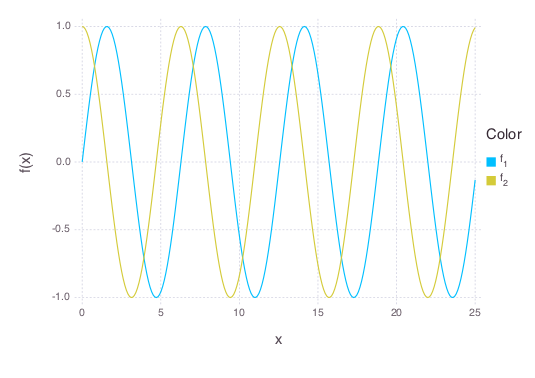

In [87]:
using Gadfly

# The plot function below is in Gadfly. 
# Add the Gadfly library with Pkg.add("Gadfly") 
# at the julia> prompt or from IJulia.

plot([sin, cos], 0, 25)

###Symbolic Data

`:` plays the role of the quotation marks in English. 

It enables us to capture the idea in the distinction between "Say 'your name'." and "Say your name." 

With a quotation function we can manipulate objects symbolically by reference to their names.

In [88]:
yourname = "Isaac"

"Isaac"

In [89]:
yourname

"Isaac"

In [90]:
:yourname

:yourname

In [91]:
typeof(:yourname)

Symbol

In [92]:
typeof(yourname)

ASCIIString (constructor with 2 methods)

The function `symbol()` also references a name symbolically:

In [93]:
anothername = "Isaiah"

"Isaiah"

In [94]:
symbol(anothername)

:Isaiah

We can use quotation to objectivy expressions, that is to pass around expressions rather than to evaluate them.

In [95]:
g = :(G*Me/r^2)

:((G * Me) / r^2)

In [96]:
typeof(g)

Expr

In [97]:
Me = 5.972e24

5.972e24

In [98]:
r = 6371000

6371000

In [99]:
G = 6.673e-11

6.673e-11

In [100]:
g

:((G * Me) / r^2)

In [101]:
eval(g)

9.818060721453536

**`memq`** takes a symbol and a list (array) and returns false if the symbol is not in the list--or the sublist beginning with the symbol. 

In [102]:
:a == :a

true

In [103]:
:a == :e

false

In [104]:
function memq(s, lst) # s a symbol, list a list
    if isempty(lst)
        false
        elseif s == lst[1]
        lst
    else
        memq(s, lst[2:end])
    end
end

memq (generic function with 1 method)

In [105]:
test = [1, 2, 3, :a, 4, 5, 6]

7-element Array{Any,1}:
 1  
 2  
 3  
  :a
 4  
 5  
 6  

In [106]:
memq(:a, test)

4-element Array{Any,1}:
  :a
 4  
 5  
 6  

In [107]:
s = :samuel

:samuel

In [108]:
typeof(s)

Symbol

The function `isvariable` returns `true` if its argument is a variable, that is here a `Symbol` type.

In [109]:
function isvariable(x)
    typeof(x) == Symbol
end

isvariable (generic function with 1 method)

In [110]:
isvariable(s)

true

In [111]:
isvariable(Me)

false

The function `samevariable` returns true if its 2 arguments are variables and equal to each other.

In [112]:
function samevariable(v1, v2)
    isvariable(v1) &&
    isvariable(v2) &&
    v1 == v2
end

samevariable (generic function with 1 method)

In [113]:
t = :samuel

:samuel

In [114]:
samevariable(s, t)

true